In [6]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

In [7]:
df = pd.read_csv("Dataset/Preprocessed.csv")

In [8]:
print(df)

        age  workclass  fnlwgt  education  education-num  marital-status  \
0      39.0          7   77516          9             12               4   
1      50.0          6   83311          9             12               2   
2      38.0          4  215646         11              8               0   
3      53.0          4  234721          1              6               2   
4      28.0          4  338409          9             12               2   
...     ...        ...     ...        ...            ...             ...   
47384  39.0          4  215419          9             12               0   
47385  64.0          0  321403         11              8               6   
47386  38.0          4  374983          9             12               2   
47387  44.0          4   83891          9             12               0   
47388  35.0          5  182148          9             12               2   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
0            

In [9]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,77516,9,12,4,1,1,4,1,2174.000000,1872.825592,40,39,0
1,50.0,6,83311,9,12,2,4,0,4,1,13061.665675,1872.825592,13,39,0
2,38.0,4,215646,11,8,0,6,1,4,1,13061.665675,1872.825592,40,39,0
3,53.0,4,234721,1,6,2,6,0,2,1,13061.665675,1872.825592,40,39,0
4,28.0,4,338409,9,12,2,10,5,2,0,13061.665675,1872.825592,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47384,39.0,4,215419,9,12,0,10,1,4,0,13061.665675,1872.825592,36,39,0
47385,64.0,0,321403,11,8,6,0,2,2,1,13061.665675,1872.825592,40,39,0
47386,38.0,4,374983,9,12,2,10,0,4,1,13061.665675,1872.825592,50,39,0
47387,44.0,4,83891,9,12,0,1,3,1,1,5455.000000,1872.825592,40,39,0


In [12]:
x = df.drop('income_encoded', axis=1)
y = df['income_encoded']

KeyError: "['income_encoded'] not found in axis"

In [ ]:
x

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_encoded,education_encoded,marital-status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native-country_encoded
0,39.0,13,2174.000000,1872.825592,40,7,9,4,1,1,4,1,39
1,50.0,13,13061.665675,1872.825592,13,6,9,2,4,0,4,1,39
2,38.0,9,13061.665675,1872.825592,40,4,11,0,6,1,4,1,39
3,53.0,7,13061.665675,1872.825592,40,4,1,2,6,0,2,1,39
4,28.0,13,13061.665675,1872.825592,40,4,9,2,10,5,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47384,39.0,13,13061.665675,1872.825592,36,4,9,0,10,1,4,0,39
47385,64.0,9,13061.665675,1872.825592,40,0,11,6,0,2,2,1,39
47386,38.0,13,13061.665675,1872.825592,50,4,9,2,10,0,4,1,39
47387,44.0,13,5455.000000,1872.825592,40,4,9,0,1,3,1,1,39


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
47384    0
47385    0
47386    0
47387    0
47388    1
Name: income_encoded, Length: 47389, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
len(X_test), len(X_train), len(y_test), len(y_train)

(9478, 37911, 9478, 37911)

# Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_train_predictions = rf_model.predict(X_train)
rf_test_predictions = rf_model.predict(X_test)

In [ ]:
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_test_accuracy = accuracy_score(y_test, rf_test_predictions)

In [ ]:
print("Random Forest Training Accuracy:", rf_train_accuracy)
print("Random Forest Test Accuracy:", rf_test_accuracy)

Random Forest Training Accuracy: 0.9747039117934109
Random Forest Test Accuracy: 0.8457480481114159


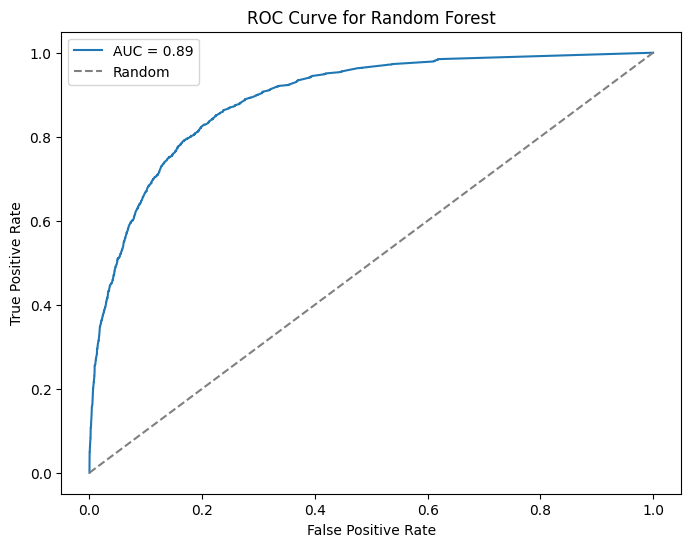

In [ ]:
# Get predicted probabilities for the positive class
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, rf_probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend()
plt.show()


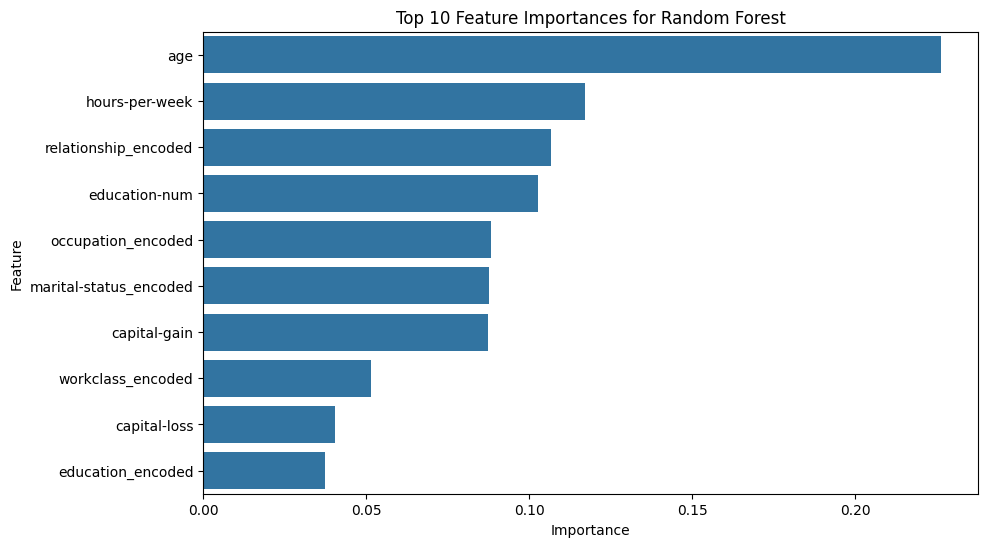

In [ ]:
# Get feature importances from the trained Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_features = 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_features))
plt.title(f'Top {top_features} Feature Importances for Random Forest')
plt.show()


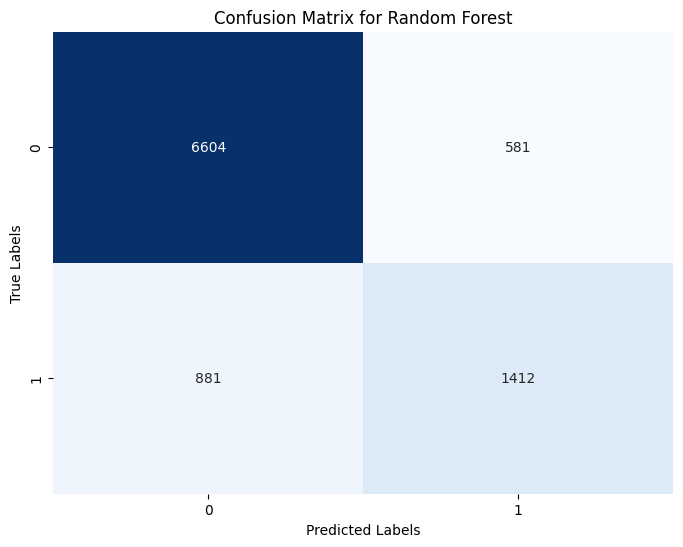

In [ ]:
# Get the confusion matrix
cm = confusion_matrix(y_test, rf_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
best_rf_predictions = best_rf_model.predict(X_test)

# Calculate accuracy for the test set
best_rf_test_accuracy = accuracy_score(y_test, best_rf_predictions)
print("Best Random Forest Test Accuracy:", best_rf_test_accuracy)


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Random Forest Test Accuracy: 0.8629457691496096


# Naïve Bayes

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_train_predictions = nb_model.predict(X_train)
nb_test_predictions = nb_model.predict(X_test)

In [ ]:
nb_train_accuracy = accuracy_score(y_train, nb_train_predictions)
nb_test_accuracy = accuracy_score(y_test, nb_test_predictions)

In [ ]:
print("Naïve Bayes Training Accuracy:", nb_train_accuracy)
print("Naïve Bayes Test Accuracy:", nb_test_accuracy)

Naïve Bayes Training Accuracy: 0.7861570520429427
Naïve Bayes Test Accuracy: 0.7876134205528592


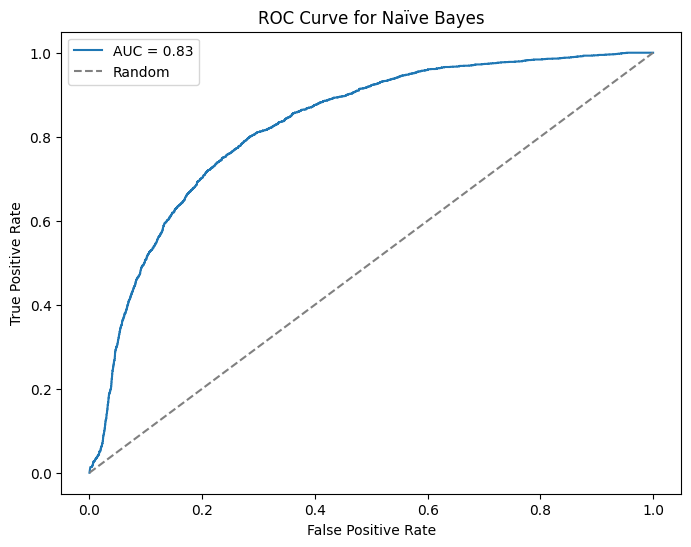

In [ ]:
# Get predicted probabilities for the positive class
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, nb_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, nb_probabilities):.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Naïve Bayes')
plt.legend()
plt.show()

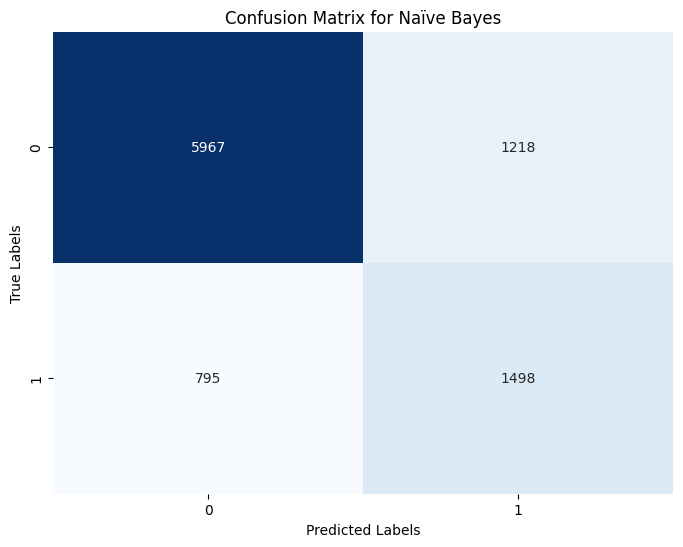

In [ ]:
# Get the confusion matrix
cm_nb = confusion_matrix(y_test, nb_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naïve Bayes')
plt.show()

# Comparing models 

In [ ]:
# Calculate accuracy for Naïve Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naïve Bayes Accuracy:", nb_accuracy)

# Calculate accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)


Naïve Bayes Accuracy: 0.7876134205528592
Random Forest Accuracy: 0.8457480481114159


In [ ]:
# Naïve Bayes
nb_classification_report = classification_report(y_test, nb_predictions)
print("Naïve Bayes Classification Report:\n", nb_classification_report)

# Random Forest
rf_classification_report = classification_report(y_test, rf_predictions)
print("Random Forest Classification Report:\n", rf_classification_report)


Naïve Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.83      0.86      7185
           1       0.55      0.65      0.60      2293

    accuracy                           0.79      9478
   macro avg       0.72      0.74      0.73      9478
weighted avg       0.80      0.79      0.79      9478

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      7185
           1       0.71      0.62      0.66      2293

    accuracy                           0.85      9478
   macro avg       0.80      0.77      0.78      9478
weighted avg       0.84      0.85      0.84      9478



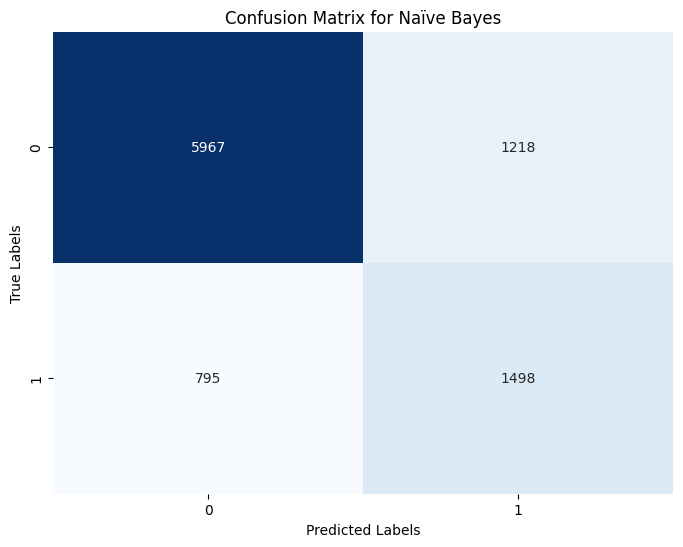

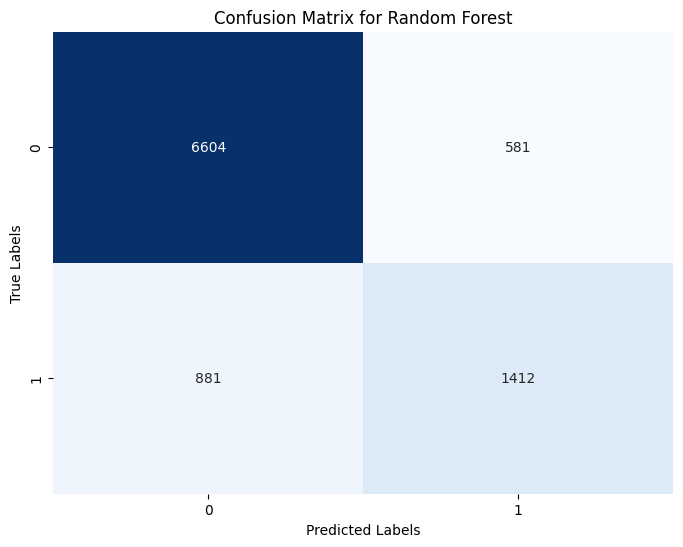

In [ ]:
# Naïve Bayes
cm_nb = confusion_matrix(y_test, nb_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naïve Bayes')
plt.show()

# Random Forest
cm_rf = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


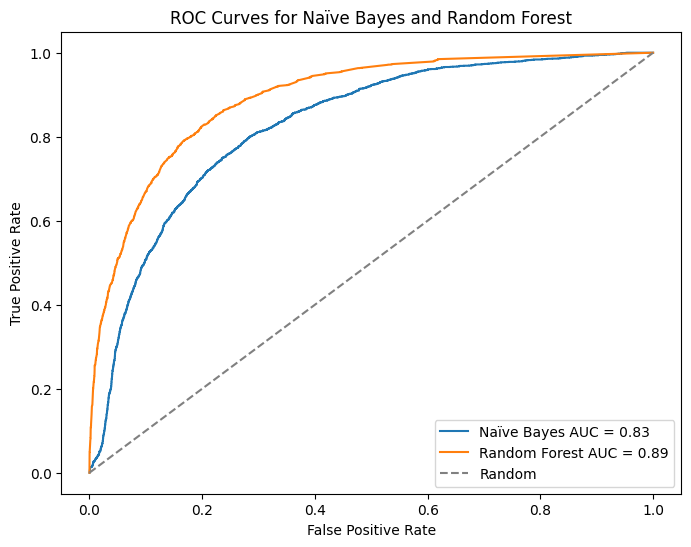

In [ ]:
# Naïve Bayes
nb_probabilities = nb_model.predict_proba(X_test)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_test, nb_probabilities)
auc_nb = roc_auc_score(y_test, nb_probabilities)

# Random Forest
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probabilities)
auc_rf = roc_auc_score(y_test, rf_probabilities)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nb, tpr_nb, label=f'Naïve Bayes AUC = {auc_nb:.2f}')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest AUC = {auc_rf:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Naïve Bayes and Random Forest')
plt.legend()
plt.show()


In [ ]:
# Random Forest
feature_importances_rf = rf_model.feature_importances_
feature_importance_df_rf = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances_rf})
feature_importance_df_rf = feature_importance_df_rf.sort_values(by='Importance', ascending=False)
print("Random Forest Feature Importances:\n", feature_importance_df_rf)


Random Forest Feature Importances:
                    Feature  Importance
0                      age    0.226469
4           hours-per-week    0.117268
9     relationship_encoded    0.106757
1            education-num    0.102604
8       occupation_encoded    0.088219
7   marital-status_encoded    0.087766
2             capital-gain    0.087326
5        workclass_encoded    0.051399
3             capital-loss    0.040351
6        education_encoded    0.037325
12  native-country_encoded    0.022130
10            race_encoded    0.018424
11             sex_encoded    0.013962
